# Variography using (mini)gstlearn - Correction
Emilie Chautru, Mike Pereira, and Thomas Romary

In [21]:
import minigst as mg
import numpy as np
import gstlearn.plot as gp
import matplotlib.pyplot as plt

In [22]:
meuse, meuse_grid = mg.data("Meuse") # load data


Comments on the dataset (from <https://www.rdocumentation.org/packages/sp/versions/1.3-1/topics/meuse>):

-   **x** and **y**: easting and northing (m) coordinates
-   **cadmium**, **copper**, **lead**, **zinc**: topsoil heavy metal concentrations (ppm) (NB: obtained from composite samples **15m x 15m**)
-   **elev**: relative elevation above the river (m)
-   **dist**: distance to the river (normalized between 0 and 1)
-   **om**, **soil**, **lime**: soil characteristics (content of organic matter, type of soil, presence of lime)
-   **ffreq**: flooding frequency
-   **landuse**: landuse classes
-   **dist.m**: distance to the river (m)

## Visualizing heavy metal concentrations

1.  Create a gstlearn `database` called `data` from the `meuse` dataset. Don't forget to set the correct variables (`x` and `y`) as coordinates! Also, add the log concentrations of `cadmium`, `copper`, `lead` and `zinc` to the resulting `database`, under the names `log_cadmium`, `log_copper`, `log_lead` and `log_zinc`. *(Hint: Use the functions `df_to_db` and `add_var_to_db`)*

In [23]:
## Create Db from dataframe
data = mg.df_to_db(meuse,coord_names = ["x","y"])

## Add log concentrations
var_name = ["cadmium", "copper", "lead", "zinc"]
mg.add_var_to_db(data,var=np.log(meuse[var_name]),vname = ["log_" + v for v in var_name])

2.  Plot each heavy metal (log)concentration.

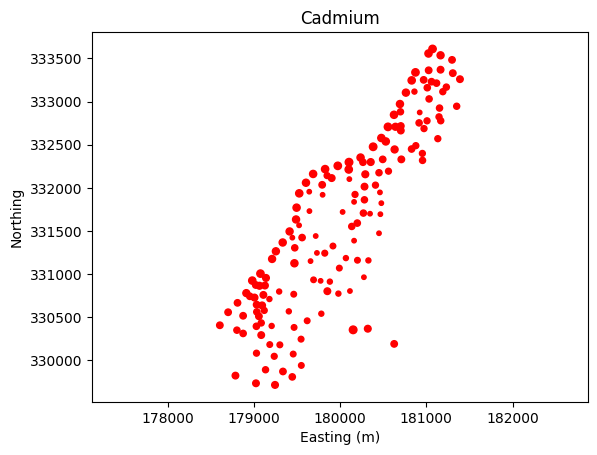

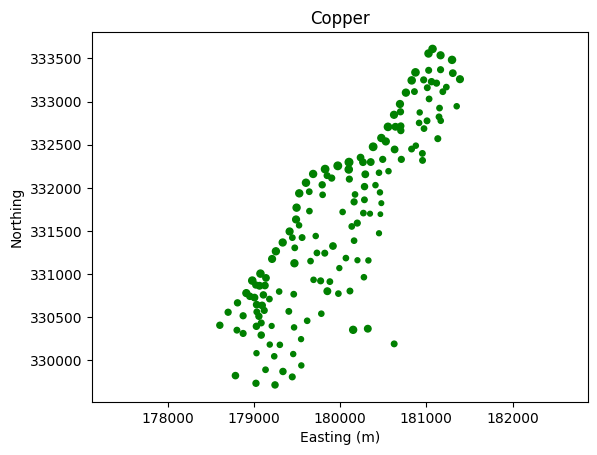

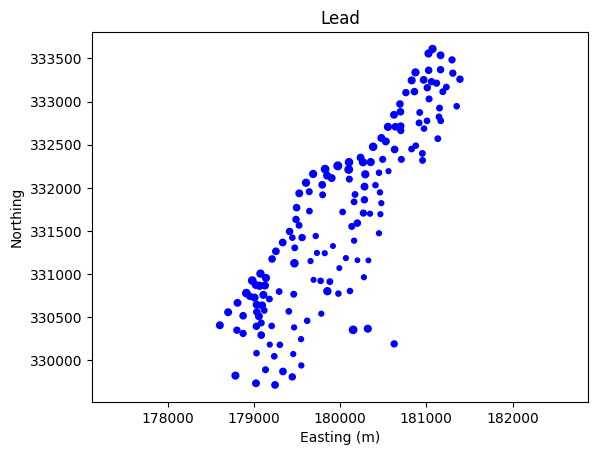

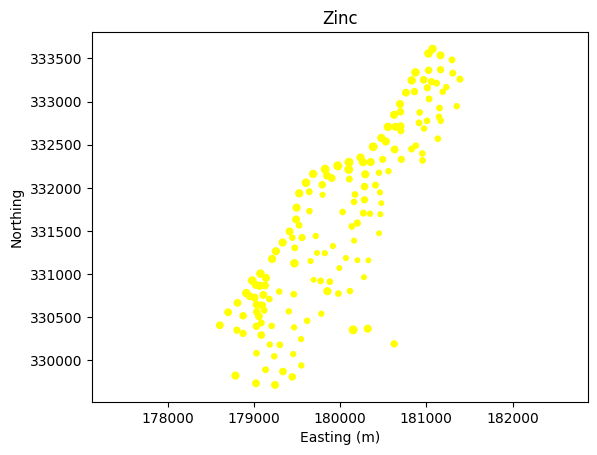

In [34]:
gp.plot(data,nameSize="log_cadmium",sizmax = 30, c = "red")
plt.axis("equal")
plt.xlabel("Easting (m)")
plt.ylabel("Northing")
plt.title("Cadmium")
plt.show()

gp.plot(data,nameSize="log_copper",sizmax = 30, c = "green")
plt.axis("equal")
plt.xlabel("Easting (m)")
plt.ylabel("Northing")
plt.title("Copper")
plt.show()

gp.plot(data,nameSize="log_lead",sizmax = 30, c = "blue")
plt.axis("equal")
plt.xlabel("Easting (m)")
plt.ylabel("Northing")
plt.title("Lead")
plt.show()

gp.plot(data,nameSize="log_zinc",sizmax = 30, c = "yellow")
plt.axis("equal")
plt.xlabel("Easting (m)")
plt.ylabel("Northing")
plt.title("Zinc")
plt.show()



3.  Compute basic statistics of each heavy metal (log)concentration. *(Hint: Use the function `summaryStats`)*


In [38]:
print(mg.summary_stats(data,vname = ["cadmium","copper","lead","zinc"]))


         NUM    MIN     MAX        MEAN        STDV    MED
cadmium  155    0.2    18.1    3.245806    3.523746    2.1
copper   155   14.0   128.0   40.316129   23.680436   31.0
lead     155   37.0   654.0  153.361290  111.320054  123.0
zinc     155  113.0  1839.0  469.716129  367.073788  326.0


In [39]:
print(mg.summary_stats(data,vname = ["log_" + v for v in ["cadmium","copper","lead","zinc"]]))


             NUM       MIN       MAX      MEAN      STDV       MED
log_cadmium  155 -1.609438  2.895912  0.561066  1.224949  0.741937
log_copper   155  2.639057  4.852030  3.556751  0.508338  3.433987
log_lead     155  3.610918  6.483107  4.807053  0.666450  4.812184
log_zinc     155  4.727388  7.516977  5.885776  0.721881  5.786897


4.  Compare the basic statistics above to those obtained when considering only the points having a Cadmium log-concentration above 0.5. Try to identify spatial repartition of the concentrations *(Hint: Use the functions `add_sel`, and `summary_stats`)*


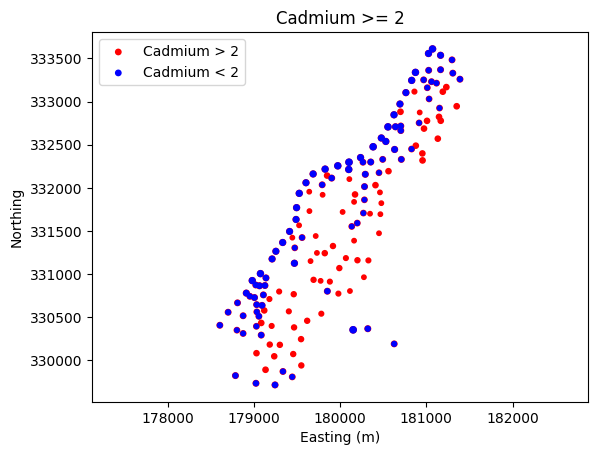

         NUM    MIN     MAX        MEAN        STDV    MED
cadmium  155    0.2    18.1    3.245806    3.523746    2.1
copper   155   14.0   128.0   40.316129   23.680436   31.0
lead     155   37.0   654.0  153.361290  111.320054  123.0
zinc     155  113.0  1839.0  469.716129  367.073788  326.0
             NUM       MIN       MAX      MEAN      STDV       MED
log_cadmium  155 -1.609438  2.895912  0.561066  1.224949  0.741937
log_copper   155  2.639057  4.852030  3.556751  0.508338  3.433987
log_lead     155  3.610918  6.483107  4.807053  0.666450  4.812184
log_zinc     155  4.727388  7.516977  5.885776  0.721881  5.786897


In [56]:
gp.plot(data,nameSize="log_cadmium", c = "red",sizmax = 20, label = "Cadmium > 2")
mg.add_sel(data,sel=data["log_cadmium"] >= 0.5)

gp.plot(data,nameSize="log_cadmium", c = "blue", sizmax = 20, label = "Cadmium < 2")
mg.clear_sel(data)
plt.legend()
plt.axis("equal")
plt.xlabel("Easting (m)")
plt.ylabel("Northing")
plt.title("Cadmium >= 2")
plt.show()

print(mg.summary_stats(data,vname = ["cadmium","copper","lead","zinc"]))
print(mg.summary_stats(data,vname = ["log_" + v for v in ["cadmium","copper","lead","zinc"]]))


In [55]:
# Remove the selection

mg.clear_sel(data)


4.  Fit the regression line of the coordinates **y** as a function of the coordinates **x**. Compare the basic statistics of each heavy metal concentration above and below the regression line. *(Hint: Use the functions `lm`, `addSel`, and `summaryStats`)*

In [ ]:

## Fit regression line
reg = lm(data["y"] ~ data["x"])
a = reg$coefficients[2]
b = reg$coefficients[1]

# Plot regression line
plt=dbplot_point(data,size="log_cadmium",sizeRange = c(0.1,3), pointColor = "gray",
             xlab = "Easting (m)", ylab = "Northing (m)", title = "Cadmium")
plt=addLines(plt,a=a,b=b,color = "orange")
print(plt)

#-----------------------------------------------

## Select values below the regression line
addSel(data,sel=(data["y"] < a * data["x"] +b))

# Plot
plt=dbplot_point(data,size="log_cadmium", pointColor = "skyblue",
             xlab = "Easting (m)", ylab = "Northing (m)", title = "Cadmium ((selection y < a*x +b))")
plt=addLines(plt,a=a,b=b,color = "orange")
print(plt)

# Compute stats
print(summaryStats(data,vname = paste0("log_", c("cadmium","copper","lead","zinc"))))

#-----------------------------------------------

## Select values above the regression line
addSel(data,sel=(data["y"] >= a * data["x"] +b))

# Plot
plt=dbplot_point(data,size="log_cadmium", pointColor = "pink",
             xlab = "Easting (m)", ylab = "Northing (m)", title = "Cadmium (selection y >= a*x +b)")
plt=addLines(plt,a=a,b=b,color = "orange")
print(plt)

# Compute stats
print(summaryStats(data,vname = paste0("log_", c("cadmium","copper","lead","zinc"))))

#-----------------------------------------------

# Remove the selection
clearSel(data)

# Variography using python

## Loading the data

Create a database `dat` containing the coordinates and the metal log-concentrations at each point of the `meuse` dataset. Recall that, for convenience, we shall work with the logarithms of the concentrations. *(Hint: You can do this by extracting the appropriate variables from the database `data` using: `data[vector_of_variable_names]`)*


In [ ]:
vn_list = c("x", "y", paste0("log_", c("cadmium", "copper", "lead", "zinc")))
dat = data[vn_list]
n=nrow(dat)

## Variogram cloud

1.  Create a matrix `dist_mat` containing all the distances between the points and a matrix `vario` containing the quantities $$\frac{1}{2}(Z(x_i)-Z(x_j))^2$$ for all the pairs of points $i$ and $j$ (using the function `outer`). You may choose to work with the cadmium concentration for this example. *(Hint: Use the function `outer` or the function `dist`)*


In [ ]:
# Matrix containing all the distances between pairs of points
dist_mat = sqrt(outer(dat[,"x"],dat[,"x"],"-")^2+outer(dat[,"y"],dat[,"y"],"-")^2) 
##alternative: 
# dist_mat = as.matrix(dist(dat[,1:2]))

# Matrix containing the square differences of Z between pairs of points
vario = 1/2*outer(dat[,"log_cadmium"],dat[,"log_cadmium"],"-")^2 
## alternative
# vario = 1/2*as.matrix(dist(dat$log_cadmium))^2

2.  Plot the variogram cloud for the cadmium concentration, and eventually for the other metals. *(Hint: Use the function `plot`)*


In [ ]:
```{r R_variogram_cloud_plot, echo=TRUE, eval=TRUE}
plot(dist_mat,vario,cex=.25,xlab="Distance[m]",ylab=" ",
     main="Variogram cloud for cadmium",pch=19)
```



## Experimental variogram (omnidirectional)

1.  Compute the experimental variogram (`hh`,`gg`) for a set of lags and the number of pairs `npairs` used to compute each value. *(Hint: use either a loop or the functions `cut` and `tapply`. The output of the function `cut` is a factor (`R` object), you may use the function `table` to compute the number of pairs for each value.)*


In [ ]:

```{r R_variogram, echo=TRUE, eval=TRUE}
lags = seq(0,2000,by=100)

# With the functions cut and tapply
sets = cut(dist_mat,lags) # assign a lag to each distance
hh = tapply(dist_mat,sets,mean) # mean distance for each set
gg = tapply(vario,sets,mean) # mean "variogram" value for each set
npairs = table(sets) # number of pairs for each set

# With a loop
lags = seq(0,2000,by=100)
hh = rep(0,length(lags))
gg = rep(0,length(lags))
npairs = rep(0,length(lags))
for (i in seq(lags)){
  sel = dist_mat<=lags[i+1] & dist_mat>lags[i]
  hh[i] = mean(dist_mat[sel])  # average distance of the selected pairs for each lag
  gg[i] = mean(vario[sel])  # average vario of the selected pairs for each lag
  npairs[i] = length(which(sel)) # number of selected pairs
}
gg = gg[1:20]
hh = hh[1:20]
npairs = npairs[1:20]


In [ ]:

2.  Plot the experimental variogram for the cadmium concentration and display the number of pairs used to compute each point of the variogram. *(Hint: Use the functions `plot` and `text`)*


In [ ]:
```

```{r R_variogram_plot, echo=TRUE, eval=TRUE}
plot(hh,gg,type="b",ylim = c(0,max(gg)),xlab="Lags",ylab="Variogram")
text(hh,gg,npairs,pos=4,offset=-2,col=2)
```


## Variogram fitting

In this section, we fit a variogram model on the experimental variogram computed previously.

1.  Create a function `expo` returning the evaluation of an exponential variogram model with range `a` and sill `C` at a lag value `h`.


In [ ]:
```{r R_cov_function, echo=TRUE, eval=TRUE}
expo = function(x,a,C){
  C*(1-exp(-x/a))
}
```

In [ ]:



2.  Manual fitting : try a few values of `(a,C)` to get a first guess on the couple that best fits the experimental variogram.


In [ ]:

```{r R_cov_manual_fitting, echo=TRUE, eval=TRUE}
a = 330
C = 1.85

plot(hh,gg,type="b",ylim=c(0,max(gg)),xlab="Lags",ylab="Variogram")
curve(expo(x,a,C),add=TRUE,col="red")
# or, equally,
# lines(hh,expo(hh,a,C),add=T,col=2)

```



3.  Automatic fitting :
  * Option 1: use the functions `nls` and `predict` to build a nonlinear least squares estimates and optimize it. Plot the optimized model on top of the experimental variogram. 
  * Option 2: use the function `optim` to find those parameters. In that case, you need to build a function that takes a vector `theta=c(a,C)` as input and returns the sum of squares you want to minimize. You can compare both methods.


In [ ]:


```{r R_cov_auto_fitting, echo=TRUE, eval=TRUE}
hh2 = hh
gg2 = gg
# option 1
m = nls(gg2~expo(hh2,a,C),start=c(a=400,C=2))

# option 2
fun_optim <- function(theta){
  sum(npairs*(gg-expo(hh,theta[1],theta[2]))^2)
}
res_optim = optim(c(400,2),fun_optim)
theta_optim = res_optim$par # optimized parameters

# comparing the result
plot(hh2, gg2, type="b", ylim = c(0,max(gg2)), xlab="Lags (m)",ylab="Variogram", main ="Cadmium (log scale)")

# automatic fitting using non linear least squares
lines(hh2, predict(m,list(hh2)), col = "orange", lw = 2)
# automatic fitting minimizing the mean squared error
lines(hh2, expo(hh2, a = theta_optim[1], C = theta_optim[2]), col = "skyblue", lty = 2, lw = 2)

# or
# curve(predict(m,list(hh2=x)), add = TRUE, col= "orange", lw = 2)
# curve(expo(x,theta_optim[1],theta_optim[2]), add=TRUE, col="skyblue", lty = 2, lw = 2)

legend("bottomright", 
       legend = c("experimental", "nls", "optim"), 
       lty = c(2, 1, 2), 
       col = c("black", "orange", "skyblue"), 
       lw = c(1, 2, 2))

# display the optimized parameters
m 
theta_optim
```

# Variography using *minigst*

## Variogram cloud


For one metal concentration (cadmium for example), compute and plot the variogram cloud (functions `VarioParam_createOmniDirection` and `db_variogram_cloud`). NB: the variogram cloud is computed for the variable located as `"z1"`. In **gstlearn**, variogram clouds are computed as grids.

The data is modelled as *samples of a regionalized* variable $z$, i.e. as evaluations at locations $x_1,..,x_n$ of a variable $z$ defined across a spatial domain: $$\lbrace z_i = z(x_i) : i = 1, ..., n\rbrace.$$

The variogram cloud is the set of pair of points defined as $$ \big\lbrace \big( \Vert x_i - x_j\Vert,  \frac{1}{2}\big\vert z(x_i)-z(x_j)\big\vert^2 \big) \quad\text{where}\quad 1\le i\le j\le n \big\rbrace $$


In [58]:
## Create variogram cloud
grid_cloud = mg.vario_cloud(data,vname = "log_cadmium")
grid_cloud.display()

## Plot variogram cloud
gp.raster(grid_cloud,"Cloud.log_cadmium")#,legendTitle="Nb of pairs", asp=0)


AttributeError: module 'minigst' has no attribute 'vario_cloud'

In [ ]:


## Experimental variogram (omnidirectional)

For one metal concentration, compute and plot the experimental variogram. Try different values of lag and comment the results.

```{r vario_omni, echo=TRUE, eval=TRUE}

varioexp=vario_exp(data,vname="log_cadmium",nlag=20, dlag=100, toldis = 0.5)
varioexp
```

We now plot the experimental variogram. In the resulting figure, the experimental variogram is plotted in blue, and the dashed blacked line corresponds to the value of the variance of the data.

```{r vario_omni_plot}
plot_vario(varioexp,pairDisplay = "size")
```

We can also adapt the size of experimental variogram points in the plot so that it is proportional to the number of pairs of points used to compute the value.

```{r vario_omni_plot_continued}
p1 = plot_vario(varioexp,pairDisplay = "label")
p2 = plot_vario(varioexp,pairDisplay = "size")
ggarrange(p1, p2, nrow = 1, ncol  = 2)
```

Trying different lags

```{r vario_omni_vs_lag_plot}
col_vario = c("gray", "skyblue", "orange", "red")
lag_vario = c(10, 50, 100, 200)
for (ilag in seq(lag_vario)) {
  lag = lag_vario[ilag]
  
  varioexp=vario_exp(data,vname="log_cadmium",
                    nlag=2500/lag, dlag=lag, toldis = 0.5)
  plt=plot_vario(varioexp,pairDisplay = "size",color = col_vario[ilag],
                 title=paste("lag=",lag,"",sep=""))
  print(plt)
}
```

## Experimental variogram (anisotropic)

1.  Compute and plot the variogram map for cadmium concentration in order to check for anisotropies.

The experimental variogram map is a map centred at the origin, which represents the value of experimental directional variogram across all directions $0^{\circ} \le \theta< 360^{\circ}$.

To compute an experimental variogram map, we use the function `db_vmap_compute` which we supply with the `Db` containing the data. The output is a `Db` containing a grid representing the variogram map values.

```{r Variogram_Map}
grid.vmap = vario_map(data, vname="log_cadmium")

vname="log_cadmium"

vn1=grid.vmap$getNames("VMAP.*.Var")[1]
p1=dbplot_grid(grid.vmap,color= vn1,cmap="Spectral",
               legendTitle ="Var", asp=0,
               title = paste0("Variogram map : ",vname))

vn2=grid.vmap$getNames("VMAP.*.Nb")[1]
p2=dbplot_grid(grid.vmap,color=vn2,cmap="RdBu",
               legendTitle ="Nb", asp=0,
               title = "Number of pairs")

print(ggarrange(p1,p2,nrow=1,ncol=2, common.legend = FALSE))
```

2.  Compute and plot directional variograms.

Much like their isotropic counterparts, experimental directional variograms are computed as `Vario` objects, which can be created from the `VarioParam` object (containing the parameters of the variogram) and a `Db` containing the data points.

This time, the `VarioParam` object is created using the function `VarioParam_createMultiple`. There, we specify the number $K$ of directions $\theta$ for which we wish to compute the an experimental variogram (argument `ndir`), as well as the reference angle $\theta_0$ of the first direction (argument `angref`, default = $0$) so that the directions $\theta$ = $\theta_0 + i(180/K)$ for $i=0,..., K-1$ are considered. We can also specify the number of lags $h$ for which the experimental variogram is computed (argument `nlag`), and the distance between these lags (argument `nlag`), as well as the tolerance $\tau$ on the lags (argument `toldis`). Then, the experimental variogram is computed just as in the isotropic case.

Note: When initializing the `VarioParam` object as described above, the angle tolerance $\eta$ is automatically set to $\eta = (90/K)$, meaning that we span the set of possible directions.

In the following example, we create an experimental variogram in the $4$ directions $\theta = 0^{\circ}, 45^{\circ}, 90^{\circ}, 135^{\circ}$.

```{r Directional_Variograms_4directions}
vario.4dir = vario_exp(data,vname="log_cadmium",dir=c(0,45,90,135),nlag=20, dlag=100.)

plot_vario(vario.4dir,pairDisplay = "size")
```

```{r Directional_Variograms_2directions}
vario.2dir = vario_exp(data,vname="log_cadmium",dir=c(45,135),nlag=20, dlag=100.)

plot_vario(vario.2dir)
# plot.init() + plot.varmod(vario.2dir) + plot.decoration(title="Directionnal variogram for cadmium (45, 135)")
```

## Model adjustement

It is also possible to guide the model fitting by proposing a list of basic covariance structures from which the model is to be built. The list of available basic covariance structures is obtained by running the following command:

```{r Basic_Structures}
printAllStruct()
```

1.  Create and adjust a model using the method `fit` (isotropic and/or anisotropic cases) on experimental variograms and display the model characteristics.

```{r fit_isotropic, echo=TRUE, eval=TRUE}
# experimental variogram
varioexp_iso = vario_exp(data,vname="log_cadmium",nlag=20, dlag=100.)

# fitting the model with the selected basic structures
struct_names=c("NUGGET","EXPONENTIAL","SPHERICAL")
model_iso=model_fit(varioexp_iso,struct=struct_names)
# display of the model
model_iso$display()

# plot of the experiment variogram and the fitted model
plot_vario(varioexp_iso,model = model_iso,pairDisplay = "size",
           title="Model adjustment for cadmium")
```

```{r fit_anisotropic, echo=TRUE, eval=TRUE}
# experimental variogram
varioexp_aniso = vario_exp(data,vname="log_cadmium",dir=c(0,45,90,135),nlag=20, dlag=100.)

# fitting the model
model_aniso=model_fit(varioexp_aniso,struct=struct_names)
# display of the model
model_aniso$display() ## look at the anisotropic matrices

# plot of the experiment variogram and the fitted model
plot_vario(varioexp_aniso,model = model_aniso,pairDisplay = "size",
           title="Model adjustment for cadmium")
```

2.  Try imposing different structures or combinations of structures.

```{r fitting_vs_structures, echo=TRUE, eval=TRUE}
struct_names = c("NUGGET","CUBIC")

# isotropic case
model_iso = model_fit(varioexp_iso,struct=struct_names)
plot_vario(varioexp_iso,model = model_aniso,pairDisplay = "size",
           title="Model adjustment for cadmium")

# anisotropic case
model_aniso = model_fit(varioexp_aniso,struct=struct_names)
plot_vario(varioexp_aniso,model = model_aniso,pairDisplay = "size",
           title="Model adjustment for cadmium")
```

3.  Compare the models adjusted on the experimental variogram and the variogram map (function `Model::fitFromVMap`).

```{r Fitting Vmap, echo=TRUE, eval=TRUE}
struct_names = c("NUGGET","EXPONENTIAL", "SPHERICAL")

# model fitted on the variogram map
modelVM = model_fit(grid.vmap,struct=struct_names)
modelVM$display()

# model fitted on the experimental variogram (4 directions)
modelexp = model_fit(varioexp_aniso,struct=struct_names)
modelexp$display()

# comparison with the model adjusted on the variogram (plot both models)
plot_vario(varioexp_aniso,model = modelVM, pairDisplay = "size",
           title="Mode fitted on variogram map")

plot_vario(varioexp_aniso,model = modelexp, pairDisplay = "size",
           title="Model fitted on experimental variogram")

```

## Multivariate variograms

1.  Compute the variograms and cross variograms for all metals, with and without anisotropy.

```{r Multivariate Modelling, echo=TRUE, eval=TRUE}

# Variable names
variable_names=paste0("log_", c("cadmium","copper","lead","zinc"))

# omni-directional variograms and cross variograms
vario_iso4var = vario_exp(data,vname=variable_names,nlag=20, dlag=100.)
dev.new() # Open new window
plot_vario(vario_iso4var)

# directional variograms and cross variograms
vario_aniso4var = vario_exp(data,vname=variable_names,dir=c(0,45,90,135),nlag=20, dlag=100.)
dev.new() # Open new window
plot_vario(vario_aniso4var)
```

2.  Adjust a model (try several options) using the function `model_fit` (isotropic and/or anisotropic cases) on experimental variograms and display the model characteristics.

```{r model_4var_iso, echo=TRUE, eval=TRUE}
# selection of possible structures
struct_names = c("NUGGET","EXPONENTIAL")

# isotropic case
model_iso4var=model_fit(vario_iso4var,struct=struct_names)

# Display and plot
model_iso4var$display()
dev.new()
plot_vario(vario_iso4var, model_iso4var)

# selection of the variables
ivar = 1
jvar = 3

p1 = plot_vario(vario_iso4var, model_iso4var, ivar = ivar, jvar = ivar,
                title = paste0(variable_names[1+ivar], "-", variable_names[1+ivar]))
p2 = plot_vario(vario_iso4var, model_iso4var, ivar = ivar, jvar = jvar,
                title = paste0(variable_names[1+ivar], "-", variable_names[1+jvar]))
p3 = plot_vario(vario_iso4var, model_iso4var, ivar = jvar, jvar = jvar,
                title = paste0(variable_names[1+jvar], "-", variable_names[1+jvar]))

dev.new()
ggarrange(p1, p2, p3, ncol = 3, nrow = 1,legend = "bottom",common.legend = TRUE)
```

```{r model_4var_aniso, echo=TRUE, eval=TRUE}
# selection of possible structures
struct_names = c("NUGGET","EXPONENTIAL")

# anisotropic case
model_aniso4var=model_fit(vario_aniso4var,struct=struct_names)

model_aniso4var$display()
dev.new()
plot_vario(vario_aniso4var, model_aniso4var)

# selection of the variables
ivar = 1
jvar = 3

p1 = plot_vario(vario_aniso4var, model_aniso4var, ivar = ivar, jvar = ivar,
                title = paste0(variable_names[1+ivar], "-", variable_names[1+ivar]))
p2 = plot_vario(vario_aniso4var, model_aniso4var, ivar = ivar, jvar = jvar,
                title = paste0(variable_names[1+ivar], "-", variable_names[1+jvar]))
p3 = plot_vario(vario_aniso4var, model_aniso4var, ivar = jvar, jvar = jvar,
                title = paste0(variable_names[1+jvar], "-", variable_names[1+jvar]))

dev.new()
ggarrange(p1, p2, p3, ncol = 3, nrow = 1,legend = "bottom",common.legend = TRUE)
```


In [2]:
import minigst as mg
jura_val_loc, jura_grid, jura_pred = mg.data("Jura")